<a href="https://colab.research.google.com/github/kkim14172/pMHC_specificity_prediction/blob/main/analyze_sentence_embedding_modify_train_test_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch

In [195]:
import numpy as np
import pandas as pd
import pickle
import math

In [6]:
sim = pickle.load(open('/content/drive/MyDrive/SBERT/cos_sim_esm2_t6_8M_UR50D-2023-07-23_23-54-37.pkl','rb'))

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
iedb_info = pd.read_csv('/content/drive/MyDrive/SBERT/iedb_A0101_withMHCinfo.csv')
iedb_info

,Unnamed: 0,peptide,binding_status,mhc_allele
0,0,EVMPVSMAK,Negative,HLA-A*01:01
1,1,KTFPPTEPK,Negative,HLA-A*01:01
2,2,ATFSVPMEK,Negative,HLA-A*01:01
3,3,KVIQPRVEK,Negative,HLA-A*01:01
4,4,RLYYDSMSY,Negative,HLA-A*01:01
...,...,...,...,...
4391,4740,LLDILDTAGR,Negative,HLA-A*01:01
4392,4741,ISLICGHSY,Negative,HLA-A*01:01
4393,4742,WTEGQSNHSTGY,Positive,HLA-A*01:01
4394,4743,WTEGQSNHSTGY,Positive,HLA-A*01:01


In [15]:
sim.keys()

dict_keys(['sentences', 'cos_sim_pos', 'cos_sim_neg'])

In [25]:
corpus_pos = pd.read_csv("/content/drive/MyDrive/SBERT/keskin_pos_A0101_data.csv")
corpus_neg = pd.read_csv("/content/drive/MyDrive/SBERT/random_neg_A0101_data.csv")

In [26]:
corpus_pos['length'] = [len(peptide) for peptide in corpus_pos['Peptide']]
corpus_neg['length'] = [len(peptide) for peptide in corpus_neg['Peptide']]

In [77]:
iedb_info['length'] = [len(peptide) for peptide in sim['sentences']]

In [103]:
np.intersect1d(np.where(np.array(iedb_info['length']) < 9), np.where(np.array(iedb_info['binding_status']) == 'Negative'))

array([ 734, 3246])

In [92]:
def draw_pos_neg_scatter(ind):
  peptide = iedb_info['peptide'][ind]
  peptide_status = iedb_info['binding_status'][ind]

  df = pd.DataFrame(dict(x=range(len(sim['cos_sim_pos'][ind])),
                       y=sim['cos_sim_pos'][ind].cpu().detach().numpy(),
                       label='positive',
                       length=corpus_pos['length']))
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),
                       y=sim['cos_sim_neg'][ind].cpu().detach().numpy(),
                       label='negative',
                       length=corpus_neg['length'])))
  label_groups = df.groupby(['label', 'length'])

  fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
  fig.suptitle('{}:{}:length({})'.format(peptide, peptide_status, len(peptide)), fontsize=15)
  for group, subdf in label_groups:
    if group[0] == 'positive':
      ax[0].plot(subdf.x, subdf.y, marker='o', linestyle='', label=group[1], markersize=2)
    elif group[0] == 'negative':
      ax[1].plot(subdf.x, subdf.y, marker='o', linestyle='', label=group[1], markersize=2)
    else: continue
  ax[0].set_title('sim_score to keskin positive peptides', fontsize=10)
  ax[1].set_title('sim_score to random negative peptides', fontsize=10)
  plt.show()

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


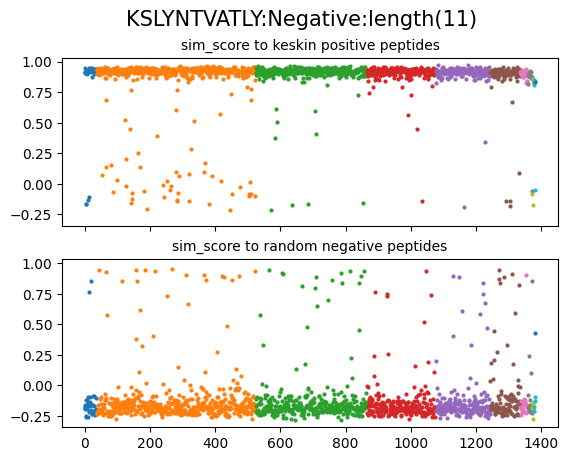

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


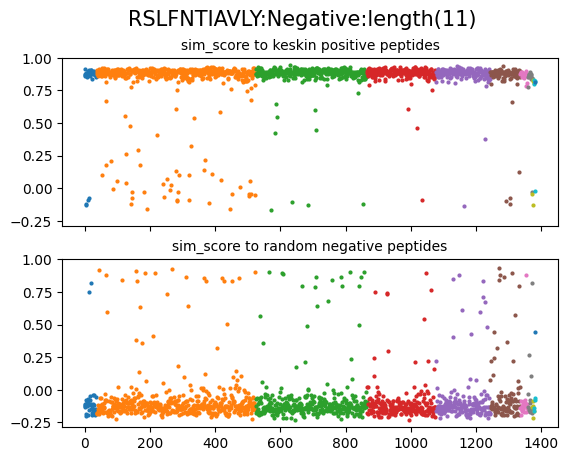

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


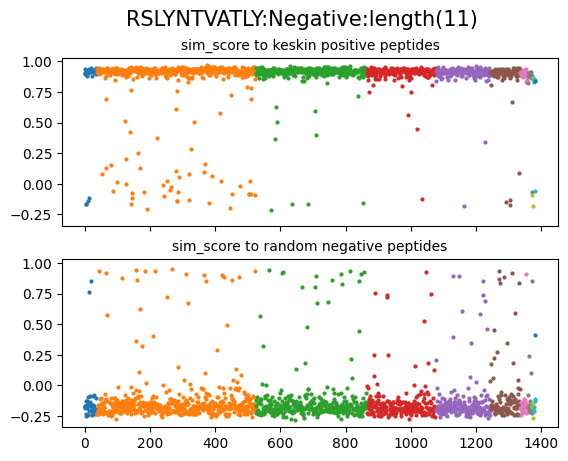

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


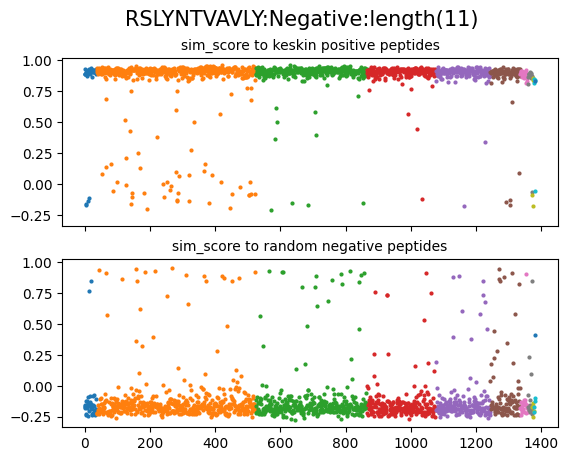

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


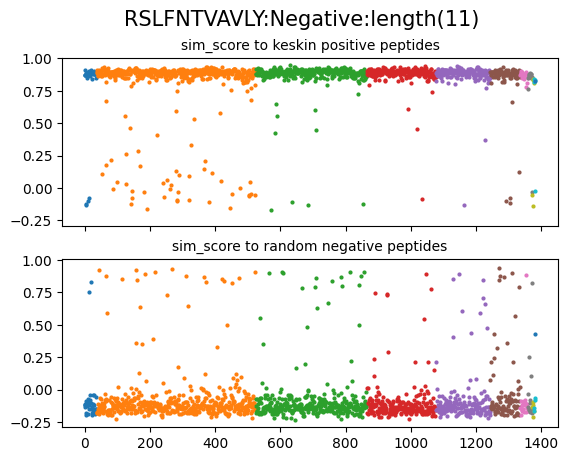

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


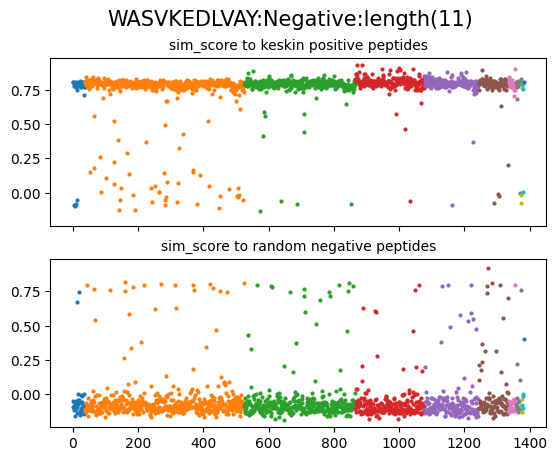

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


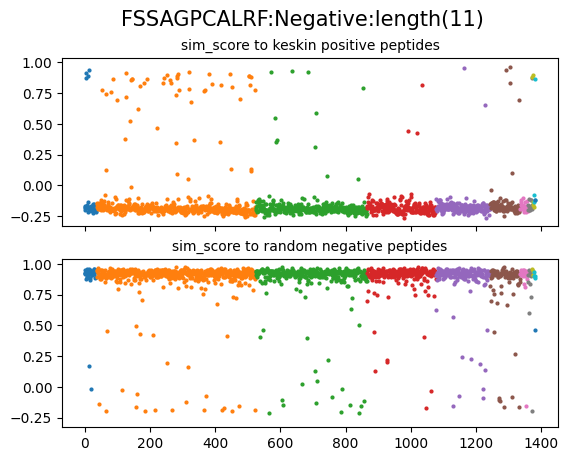

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


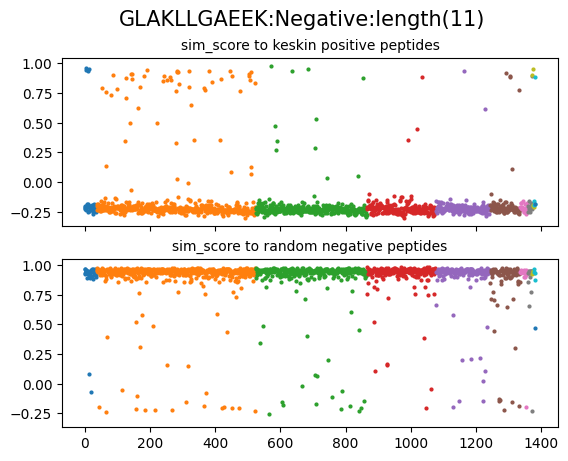

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


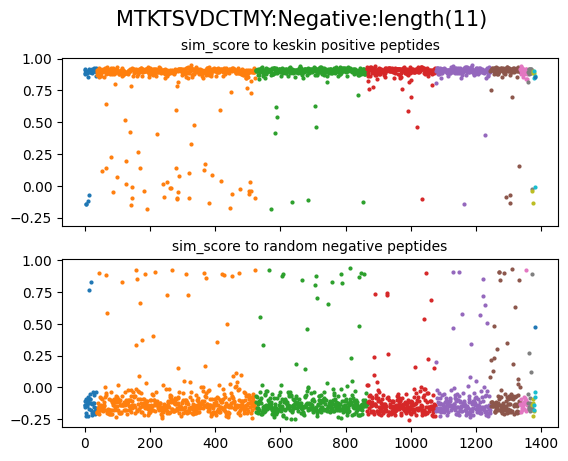

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


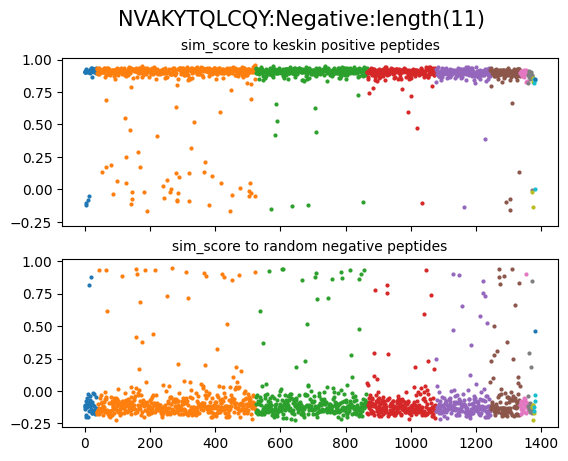

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


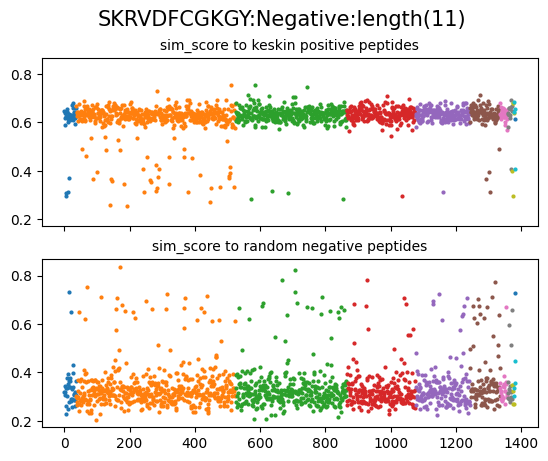

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


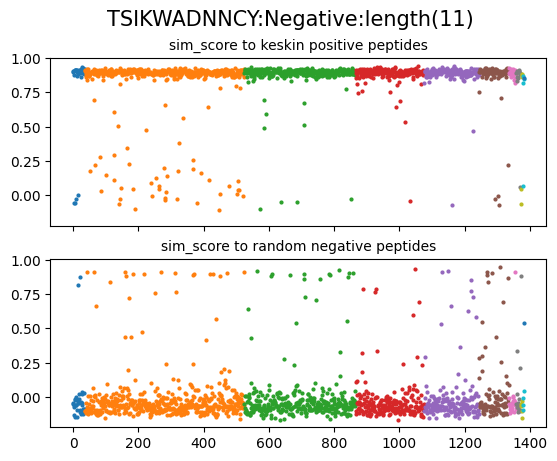

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


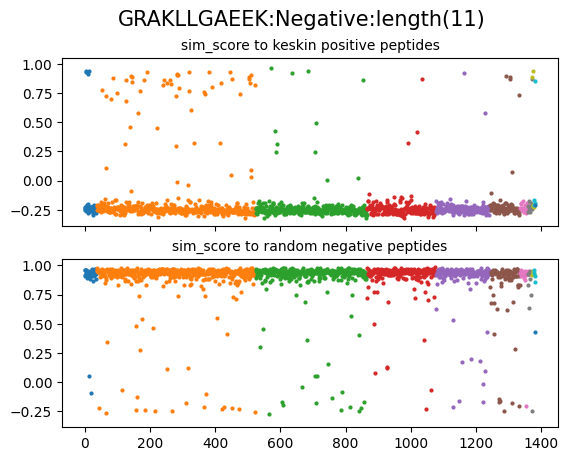

In [102]:
for i in np.intersect1d(np.where(np.array(iedb_info['length']) > 10), np.where(np.array(iedb_info['binding_status']) == 'Negative')):
  draw_pos_neg_scatter(i)

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


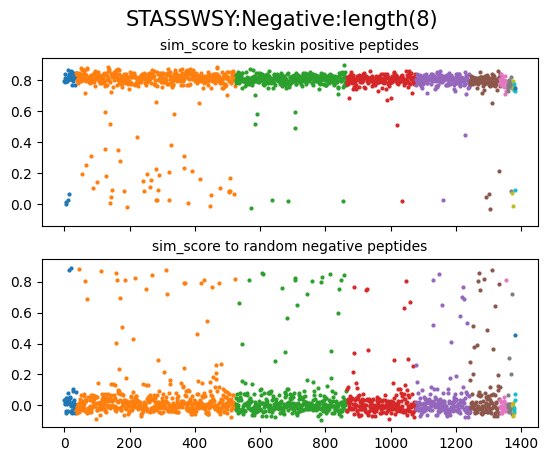

<ipython-input-92-d95dd30008b5>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(dict(x=range(len(sim['cos_sim_neg'][ind])),


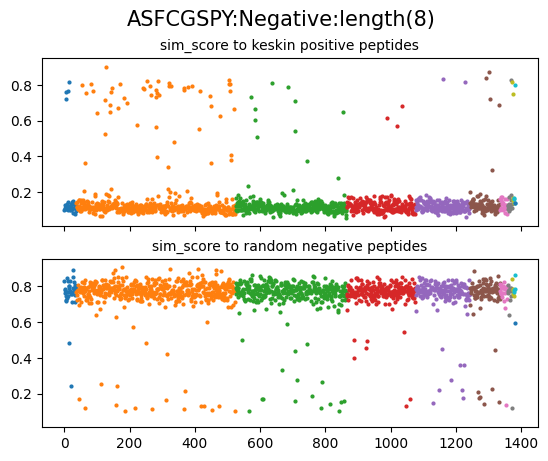

In [104]:
for i in np.intersect1d(np.where(np.array(iedb_info['length']) < 9), np.where(np.array(iedb_info['binding_status']) == 'Negative')):
  draw_pos_neg_scatter(i)

In [190]:
iedb_info['mean_sim_score_pos'] = [torch.mean(a).cpu().detach().numpy() for a in sim['cos_sim_pos']]
iedb_info['mean_sim_score_neg'] = [torch.mean(a).cpu().detach().numpy() for a in sim['cos_sim_neg']]

In [191]:
iedb_info['sbert_qual'] = 'Poor'
iedb_info.loc[(iedb_info['binding_status'].str.contains("Positive")) & (iedb_info['mean_sim_score_pos'] > iedb_info['mean_sim_score_neg']) & (iedb_info['mean_sim_score_pos'] > 0.5), 'sbert_qual'] = 'Good'
iedb_info.loc[(iedb_info['binding_status'] == 'Negative') & (iedb_info['mean_sim_score_neg'] > iedb_info['mean_sim_score_pos']) & (iedb_info['mean_sim_score_neg'] > 0.5), 'sbert_qual'] = 'Good'
iedb_info

,Unnamed: 0,peptide,binding_status,mhc_allele,length,mean_sim_score_pos,mean_sim_score_neg,sbert_qual
0,0,EVMPVSMAK,Negative,HLA-A*01:01,9,-0.18175961,0.8896463,Good
1,1,KTFPPTEPK,Negative,HLA-A*01:01,9,-0.104771204,0.87603956,Good
2,2,ATFSVPMEK,Negative,HLA-A*01:01,9,-0.14409995,0.8958546,Good
3,3,KVIQPRVEK,Negative,HLA-A*01:01,9,-0.16462965,0.8928469,Good
4,4,RLYYDSMSY,Negative,HLA-A*01:01,9,0.8227609,-0.120350845,Poor
...,...,...,...,...,...,...,...,...
4391,4740,LLDILDTAGR,Negative,HLA-A*01:01,10,-0.034263104,0.82775986,Good
4392,4741,ISLICGHSY,Negative,HLA-A*01:01,9,0.31345868,0.6384547,Good
4393,4742,WTEGQSNHSTGY,Positive,HLA-A*01:01,12,0.8610999,-0.060235787,Good
4394,4743,WTEGQSNHSTGY,Positive,HLA-A*01:01,12,0.8610999,-0.060235787,Good


In [144]:
iedb_info.groupby(['binding_status','length'])[['mean_sim_score_pos','mean_sim_score_neg']].aggregate('mean')

mean_sim_score_pos  mean_sim_score_neg
binding_status        length                                        
Negative              8                 0.463015            0.402353
                      9                 0.177245            0.611288
                      10                0.327870            0.467142
                      11                0.596022            0.176398
Positive              8                 0.638196            0.142982
                      9                 0.795436           -0.029588
                      10                0.773493           -0.007156
                      11                0.789571           -0.030667
                      12                0.817563           -0.056672
                      13                0.766011           -0.008826
                      14                0.858015           -0.071845
                      15                0.380360            0.371375
Positive-High         8                 0.777374            0.082446
                      9                 0.765222            0.005897
                      10                0.841139           -0.071109
                      11                0.889550           -0.141985
Positive-Intermediate 8                 0.854567           -0.056514
                      9                 0.701008            0.087022
                      10                0.724383            0.056869
                      11                0.838659           -0.072148
Positive-Low          8                 0.775452            0.035255
                      9                 0.489560            0.303684
                      10                0.680774            0.105826
                      11                0.847597           -0.081230

In [192]:
quality_summary = iedb_info.pivot_table(index=['binding_status', 'length'], columns='sbert_qual', aggfunc='size', fill_value=0)
quality_summary

sbert_qual                    Good  Poor
binding_status        length            
Negative              8          1     1
                      9        492   191
                      10        72    50
                      11         3    10
Positive              8        124    42
                      9       1407   130
                      10       668    70
                      11       294    22
                      12       188    10
                      13         8     1
                      14         1     0
                      15         1     1
Positive-High         8          1     0
                      9        121    16
                      10        18     0
                      11         3     0
Positive-Intermediate 8          1     0
                      9         94    19
                      10        14     2
                      11         1     0
Positive-Low          8          6     1
                      9        145    96
                      10        46    12
                      11        13     0

In [213]:
poor_10_perc = iedb_info[iedb_info['sbert_qual'] == 'Poor'].groupby(['binding_status', 'length']).apply(lambda x: x.sample(n=math.ceil(len(x) * 0.1)))
poor_10_perc

Unnamed: 0     peptide binding_status  \
binding_status length                                               
Negative       8      734          734    STASSWSY       Negative   
               9      109          109   FMGRIRSVY       Negative   
                      807          807   FFGETSHNY       Negative   
                      327          327   MQYLNPPPY       Negative   
                      1372        1372   MTGVMRGNY       Negative   
...                                ...         ...            ...   
Positive-Low   9      759          759   RQIRMTSTI   Positive-Low   
                      882          882   FMVYVPLPA   Positive-Low   
                      1439        1439   YSDIFNNVL   Positive-Low   
               10     4355        4702  NVDENANANN   Positive-Low   
                      3256        3540  RSASFCGSPY   Positive-Low   

                             mhc_allele  length mean_sim_score_pos  \
binding_status length                                                
Negative       8      734   HLA-A*01:01       8          0.7753034   
               9      109   HLA-A*01:01       9          0.6130033   
                      807   HLA-A*01:01       9          0.8763886   
                      327   HLA-A*01:01       9         0.71539825   
                      1372  HLA-A*01:01       9          0.7050806   
...                                 ...     ...                ...   
Positive-Low   9      759   HLA-A*01:01       9        -0.12773296   
                      882   HLA-A*01:01       9        -0.14091602   
                      1439  HLA-A*01:01       9         0.08142023   
               10     4355  HLA-A*01:01      10        -0.11928883   
                      3256  HLA-A*01:01      10        0.016158978   

                           mean_sim_score_neg sbert_qual  
binding_status length                                     
Negative       8      734         0.052297156       Poor  
               9      109          0.33487862       Poor  
                      807         -0.06720276       Poor  
                      327           0.0471007       Poor  
                      1372         0.21993162       Poor  
...                                       ...        ...  
Positive-Low   9      759          0.87623286       Poor  
                      882           0.8909718       Poor  
                      1439          0.7962108       Poor  
               10     4355          0.8819406       Poor  
                      3256         0.81682575       Poor  

[76 rows x 8 columns]

In [218]:
poor_10_perc[['peptide','binding_status','mhc_allele']].to_csv('/content/drive/MyDrive/SBERT/iedb_A0101_neg_10perc.csv', index=False)

In [225]:
test_neg_90_perc = iedb_info.loc[~iedb_info.index.isin([index[2] for index in poor_10_perc.index])][['peptide','binding_status','mhc_allele']]
test_neg_90_perc.to_csv('/content/drive/MyDrive/SBERT/iedb_A0101_neg_90perc.csv', index=False)